In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve

In [ ]:
# Carregar os dados
data = pd.read_csv("Fluxo Escolar 2013_2023.csv")

In [ ]:
def evaluate_model(X, y, model, model_type="regression"):
    # Normalizar as variáveis numéricas
    scaler = StandardScaler()
    X[['ANO_LETIVO', 'APR_3', 'REP_3']] = scaler.fit_transform(X[['ANO_LETIVO', 'APR_3', 'REP_3']])

    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Treinar o modelo
    model.fit(X_train, y_train)

    if model_type == "regression":
        y_pred = model.predict(X_test)
        print("\nMétricas para Regressão:")
        print("R²:", r2_score(y_test, y_pred))
        print("MAE:", mean_absolute_error(y_test, y_pred))
        print("MSE:", mean_squared_error(y_test, y_pred))

        # Plotar Reais vs Preditos
        plt.scatter(y_test, y_pred, color="blue")
        plt.plot(y_test, y_test, color="red", linestyle="--")
        plt.xlabel("Valores Reais")
        plt.ylabel("Valores Preditos")
        plt.title("Reais vs Preditos")
        plt.show()

    elif model_type == "classification":
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]
        print("\nMétricas para Classificação:")
        print(classification_report(y_test, y_pred))
        print("AUC-ROC:", roc_auc_score(y_test, y_proba))

        # Plotar curva ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("Taxa de Falsos Positivos")
        plt.ylabel("Taxa de Verdadeiros Positivos")
        plt.title("Curva ROC")
        plt.legend()
        plt.show()

        # Calibração
        prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label="Modelo")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Perfeitamente Calibrado")
        plt.xlabel("Probabilidade Predita")
        plt.ylabel("Frequência Real")
        plt.title("Gráfico de Calibração")
        plt.legend()
        plt.grid()
        plt.show()


Métricas para Regressão:
R²: 0.6743152826013532
MAE: 0.452447215022087
MSE: 3.1689866791860073


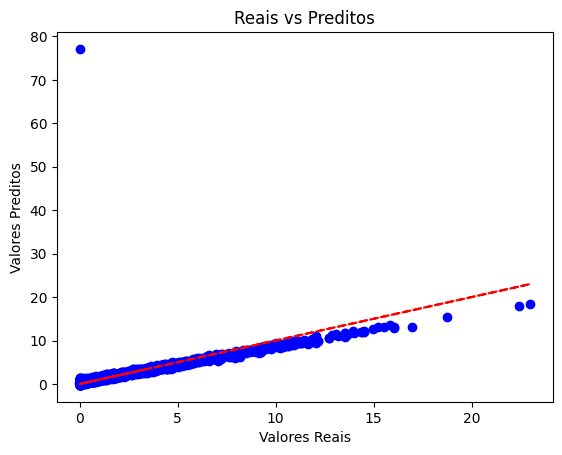

In [ ]:
# Filtrando as colunas necessárias
X_regression = pd.get_dummies(data[['ANO_LETIVO', 'APR_3', 'REP_3', 'MESORREGIAO']],
                          columns=['MESORREGIAO'],
                          drop_first=True) # One-Hot Encoding para a variável categórica MESORREGIAO
y_regression = data['ABA_3']

# Executando a regressão linear
linear_model = LinearRegression()
evaluate_model(X_regression, y_regression, linear_model, model_type="regression")


Métricas para Regressão:
R²: 0.9841562494311686
MAE: 0.16781749764816556
MSE: 0.15416331138287867


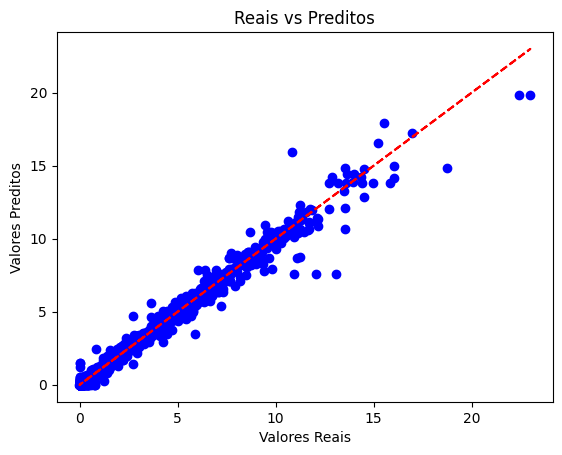

In [ ]:
# Executando a Árvore de Regressão
regression_tree_model = DecisionTreeRegressor()
evaluate_model(X_regression, y_regression, regression_tree_model, model_type="regression")


Métricas para Regressão:
R²: 0.674830737384517
MAE: 0.45427575437291895
MSE: 3.1639711864278084


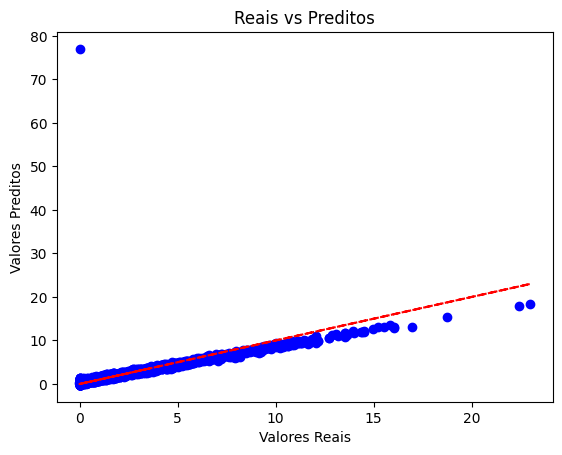

In [ ]:
# Executando Ridge
ridge_model = Ridge()
evaluate_model(X_regression, y_regression, ridge_model, model_type="regression")


Métricas para Regressão:
R²: 0.4092324830227182
MAE: 1.6937620607153054
MSE: 5.748302857899398


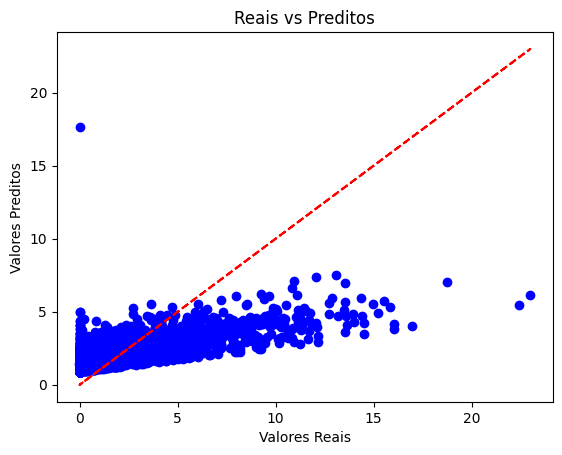

In [ ]:
# Executando Lasso
lasso_model = Lasso()
evaluate_model(X_regression, y_regression, lasso_model, model_type="regression")


Métricas para Regressão:
R²: 0.9854148504078739
MAE: 0.08666735653809972
MSE: 0.14191683644402633


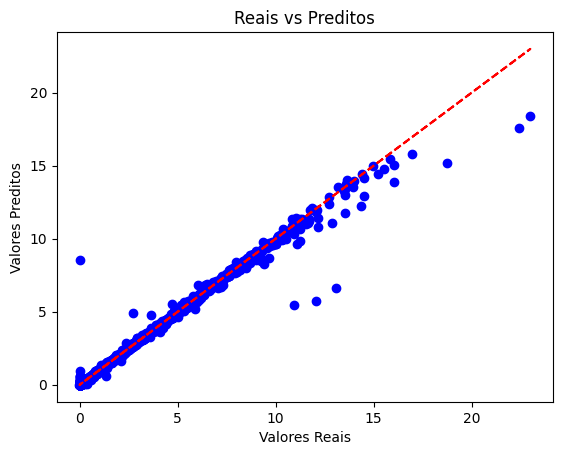

In [ ]:
# Executando Random Forest Regressor
random_forest_model = RandomForestRegressor()
evaluate_model(X_regression, y_regression, random_forest_model, model_type="regression")


Métricas para Regressão:
R²: 0.9832424120933393
MAE: 0.23273597269203855
MSE: 0.1630551573793832


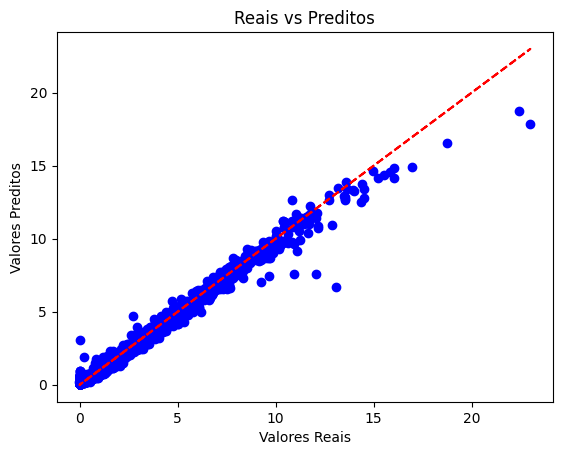

In [ ]:
# Executando Gradient Boosting Regressor
gradient_regressor_model = GradientBoostingRegressor()
evaluate_model(X_regression, y_regression, gradient_regressor_model, model_type="regression")


Avaliação do modelo MLPRegressor:

Métricas para Regressão:
R²: 0.9910222065159362
MAE: 0.03751409666662749
MSE: 0.08735598092144115


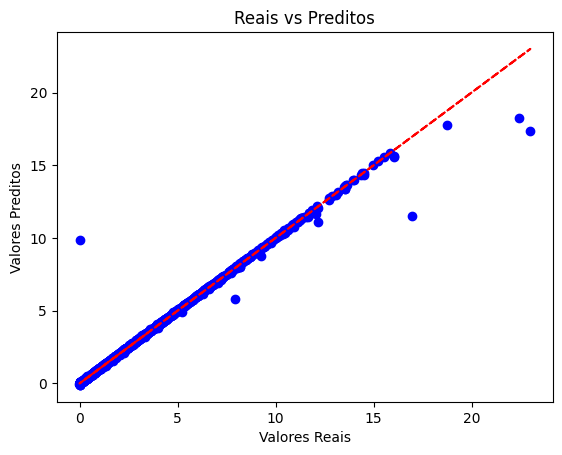

In [ ]:
# Adicionando o MLPRegressor (Rede Neural para Regressão)
mlp_model = MLPRegressor(hidden_layer_sizes=(100,),
                         activation='relu',
                         solver='adam',
                         max_iter=1000,
                         random_state=42)

print("\nAvaliação do modelo MLPRegressor:")
evaluate_model(X_regression, y_regression, mlp_model, model_type="regression")

In [ ]:
# Binarizar a variável dependente (threshold arbitrário)
threshold = data['ABA_3'].mean()
y_classification = (data['ABA_3'] > threshold).astype(int)

X_classification = pd.get_dummies(data[['ANO_LETIVO', 'APR_3', 'REP_3', 'MESORREGIAO']],
                          columns=['MESORREGIAO'],
                          drop_first=True) # One-Hot Encoding para a variável categórica MESORREGIAO


Métricas para Classificação:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1363
           1       0.99      0.95      0.97       763

    accuracy                           0.98      2126
   macro avg       0.98      0.97      0.98      2126
weighted avg       0.98      0.98      0.98      2126

AUC-ROC: 0.9987740019173649


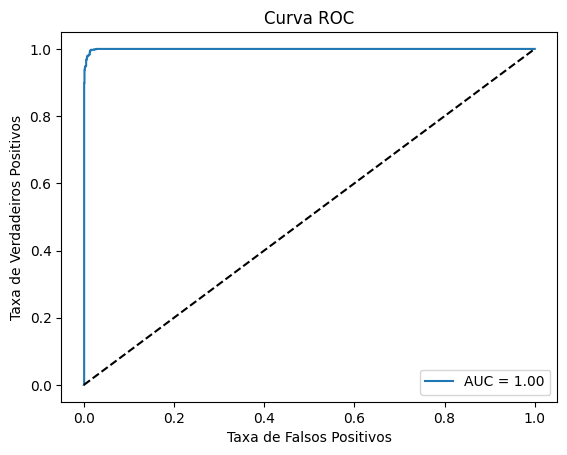

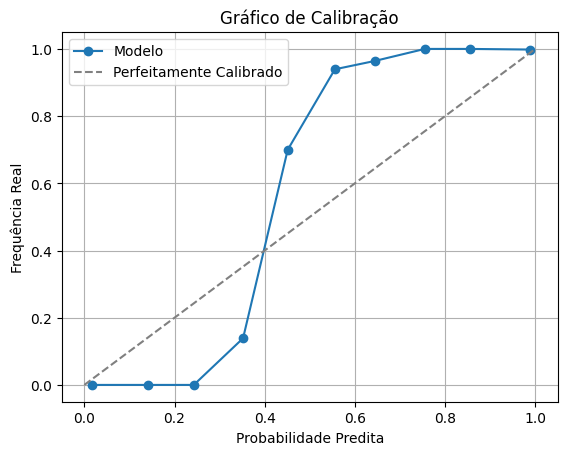

In [ ]:
# Regressão Logística
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(X_classification, y_classification, logistic_model, model_type="classification")


Métricas para Classificação:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1363
           1       0.98      0.97      0.97       763

    accuracy                           0.98      2126
   macro avg       0.98      0.98      0.98      2126
weighted avg       0.98      0.98      0.98      2126

AUC-ROC: 0.9783248346825721


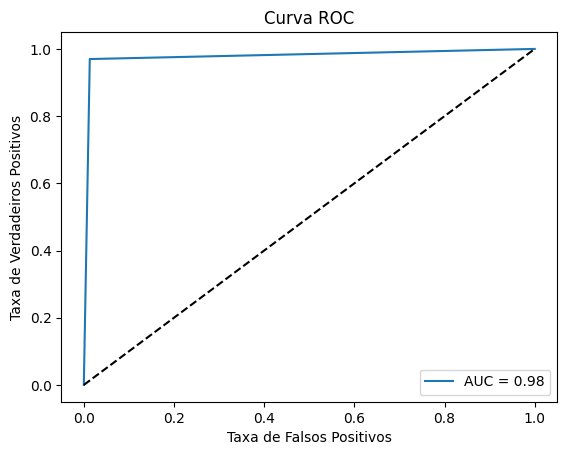

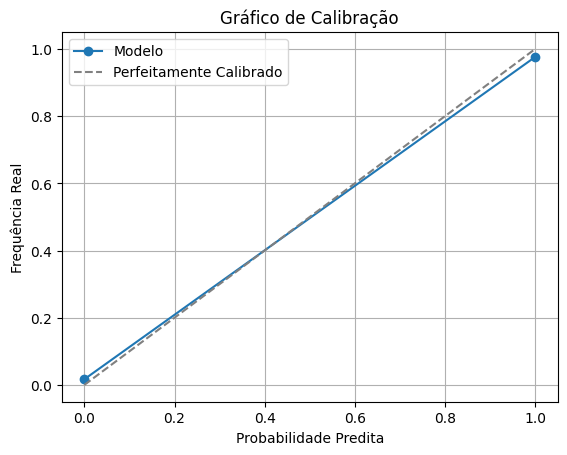

In [ ]:
# Árvore de Decisão
tree_model = DecisionTreeClassifier()
evaluate_model(X_classification, y_classification, tree_model, model_type="classification")